<a href="https://colab.research.google.com/github/kanyaweeud/KKU_data_mining/blob/master/Rain_Accumulation_forecasting_by_using_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#RAIN ACCUMULATION FORECASTING BY USING DECISION TREE CLASSIFIER
---





**By** กัญญาวีร์ อุดม 613020610-8 และสุภัทธา ทิ้งไทยสงค์ 613021026-2

---
#Visualization 
---

---
>Import the nescesary libraries for rain accumulation forecasting.
*   sklearn.metrics.accuracy_score 
*   sklearn.model_selection.train_test_split
*   sklearn.tree.DecisionTreeClassifier

---

In [140]:
#Import the pandas library for visualizing data | การ import ให้สามารถเรียกใช้ไลบรารี่ pandas ในการ visualizing ชุดข้อมูล
import pandas as pd 

#Import the accuracy_score library from scikit-learn module | การ import ให้สามารถเรียกใช้ไลบรารี่ accuracy_score ในการหาค่าความแม่นยำในการพยากรณ์ด้วยตัวแบบ decision tree 
from sklearn.metrics import accuracy_score 

#Import the train_test_split library from scikit-learn module | การ import ให้สามารถเรียกใช้ไลบรารี่ train_test_split ในการแบ่งชุดข้อมูลออกเป็น 2 ส่วน 
from sklearn.model_selection import train_test_split 

#Import the DecisionTreeClasifier from scikit-learn module | การ import ให้สามารถเรียกใช้ไลบรารี่ DecisionTreeClassifier ในการใช้งานตัวแบบ decision tree 
from sklearn.tree import DecisionTreeClassifier

#Import the matplotlib.pyplot library | การ import ให้สามารถเรียกใช้ไลบรารี่ matplotlib.pyplot ในการพลอตกราฟ 
import matplotlib.pyplot as plt

#Import the seaborn library | การ import ให้สามารถเรียกใช้ไลบรารี่ seaborn ในการพลอตกราฟที่เป็น dataframe 
import seaborn as sns

---
>Import the drive library for integration Google Colab with Google Drive to access any files on Google Drive.
*    google.colab.drive

---

In [141]:
#Import the drive library from Google Colab module | การ import ให้สามารถเรียกใช้ไลบรารี่ drive ในการเข้าถึงไฟล์บน Google Drive
from google.colab import drive  

#Mount the drive on Google Colab to access any files from Google Drive | การ mount ไดร์ฟบน Google Colab ในการเข้าถึงไฟล์บน Google Drive 
drive.mount('/content/drive')

#Define the path to access .csv files on Google Drive | กำหนดตำแแหน่งของ path ในการเข้าถึงไฟล์นามสกุล .csv บน Google Drive
path = '/content/drive/My Drive/DWDM_Material/daily_weather.csv' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
>Read .csv files on the path. 
---

In [142]:
#Read .csv files on the path with pandas | การอ่านไฟล์นามสกุล .csv ตามตำแหน่งของ path ที่กำหนด ด้วยไลบรารี่ pandas 
data = pd.read_csv("/content/drive/My Drive/DWDM_Material/TMD.csv")

#Display the dataframe of data variable while using head() method to show only the first 5 indexes | การแสดง dataframe ของตัวแปร data เฉพาะ index 5 อันดับแรกด้วยเมธอด head()
data.head()

,timestamp,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity,rain_accumulations
0,1/1/2016,30.0,17.0,16.3,14,67,0.0
1,1/2/2016,31.2,18.1,17.1,15,67,0.0
2,1/3/2016,31.5,18.1,16.7,10,64,0.0
3,1/4/2016,33.7,17.4,17.2,7,64,0.0
4,1/5/2016,34.3,19.5,15.1,17,54,0.0


---
>Display all of the column name on data variable.
---

In [143]:
 #Display all of the column name in data variable  | การแสดงชื่อคอลัมน์ทั้งหมดในตัวแปร data 
 data.columns

Index(['timestamp', 'max_air_temp', 'min_air_temp', 'dew_point_temp',
       'max_wind_speed', 'relative_humidity', 'rain_accumulations'],
      dtype='object')

---
#Cleaning a dataset
---

---
>Check null values every single row then get rid of those values to make a clean dataset.
---

In [144]:
#Check null values every single row of data variable then returns the two boolean values | การตรวจสอบค่า null ในทุกแถวของตัวแปร่ data จากนั้น return ค่าประเภท boolean ได้แก่ "True" หรือ "False"
data.isnull().any().any()

False

---
>Summarize null values each column to look at the columns which have nulll values.
---

In [145]:
#Summarize null values each column while using sum() method | การหาผลรวมของค่า null ในแต่ละคอลัมน์ด้วยเมธอด sum()
data.isnull().sum() 

timestamp             0
max_air_temp          0
min_air_temp          0
dew_point_temp        0
max_wind_speed        0
relative_humidity     0
rain_accumulations    0
dtype: int64

---
>Display the value of every single row which have null values.
---

In [146]:
#We have to define the axis parameter of any() method to 1 for displaying the value of every single row which have null values 
#การแสดงค่าทุกแถวใน dataframe ที่เป็นค่า null ด้วยการกำหนด "axis=1" ใน any()
data[data.isnull().any(axis = 1)]

,timestamp,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity,rain_accumulations


---
#Convert a column to binary values for classification problem
---

In [147]:
#Duplicate the dataframe to avoid confusion | การทำสำเนาของ dataframe เพื่อหลีกเลี่ยงการทับซ้อนกันของการเรียกใช้ dataframe 
clean_data = data.copy() 

#Convert all values on the specific column to binary values with threshold | การแปลงค่าภายในคอลัมน์ที่กำหนดของ dataframe ให้เป็นค่าไบนารี่ "0" หรือ "1" ด้วยการกำหนดค่า theshold เป็น 0.1
#ถ้าหากค่าภายในคอลัมน์มากกว่าค่า theshold (0.1) จะแทนค่าด้วย "1" หากต่ำกว่า theshold จะแทนด้วย "0"
#ค่าไบนารี่ "1" แทนการเกิดฝนของวันนั้น ส่วน "0" แทนไม่มีการเกิดฝนในว้นนั้น
clean_data['high_rain_accumulations_label'] = (clean_data['rain_accumulations'] > 0.1) * 1 

#Display what values we have on the specific column | การแสดงค่าภายในคอลัมน์ที่กำหนดของ dataframe
print(clean_data['high_rain_accumulations_label'])

0       0
1       0
2       0
3       0
4       0
       ..
1779    0
1780    0
1781    0
1782    0
1783    0
Name: high_rain_accumulations_label, Length: 1784, dtype: int64


---
>Set a converted column as y variable.
---

In [148]:
#Duplicate the dataframe to avoid confusion | การทำสำเนาของ dataframe เพื่อหลีกเลี่ยงการทับซ้อนกันของการเรียกใช้ dataframe 
#Set the duplicated dataframe as y (0 or 1) | การ set ให้ dataframe ที่ทำสำเนาแล้วแทนด้วยตัวแปร y
y = clean_data[['high_rain_accumulations_label']].copy()

#Display the y's dataframe | การแสดงค่าภายใน dataframe ของตัวแปร y
y

,high_rain_accumulations_label
0,0
1,0
2,0
3,0
4,0
...,...
1779,0
1780,0
1781,0
1782,0


---
>Look at the column for some values.
---

In [149]:
#Display the column values only the first 5 indexes | การแสดงค่าของคอลัมน์ใดๆเฉพาะ index 5 อันดับแรก
clean_data['rain_accumulations'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rain_accumulations, dtype: float64

In [150]:
#Check a few values on the y's dataframe | การตรวจสอบค่าเฉพาะ index 5 อันดับแรก 
y.head()

,high_rain_accumulations_label
0,0
1,0
2,0
3,0
4,0


In [151]:
#Define the features list that contains column name | การกำหนดค่าให้ตัวแปร features ที่เป็น list โดยภายในจะเก็บค่า 
features = ['max_air_temp','min_air_temp','dew_point_temp','max_wind_speed','relative_humidity']
print(features)

['max_air_temp', 'min_air_temp', 'dew_point_temp', 'max_wind_speed', 'relative_humidity']


In [152]:
#Duplicate the dataframe to avoid confusion | การทำสำเนาของ dataframe เพื่อหลีกเลี่ยงการทับซ้อนกันของการเรียกใช้ dataframe 
#Set the duplicated dataframe as X | การ set ให้ dataframe ที่ทำสำเนาแล้วแทนด้วยตัวแปร X
X = clean_data[features].copy()

#Display the X's dataframe | การแสดงค่าภายใน dataframe ของตัวแปร X
X

,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity
0,30.0,17.0,16.3,14,67
1,31.2,18.1,17.1,15,67
2,31.5,18.1,16.7,10,64
3,33.7,17.4,17.2,7,64
4,34.3,19.5,15.1,17,54
...,...,...,...,...,...
1779,30.0,17.5,13.1,9,56
1780,30.6,18.8,15.5,10,60
1781,31.0,21.4,19.4,14,70
1782,32.5,21.8,21.1,6,73


---
#Split the dataset for training and testing the model
---

---
>Split the dataset into 4 separated parts.
---

In [153]:
#Split the dataset with specific params |  การแยกชุดข้อมูลออกเป็นส่วนๆเพื่อใช้สำหรับ training และ testing ตัวแบบซึ่งจะประกอบไปด้วย X_train X_test y_train และ y_test
#We define the test_size to 0.33 that would be 67:33 training and testing ratio | การกำหนดอัตราส่วนในการแบ่งชุดข้อมูลออกเป็นส่วนในที่นี้จะใช้อัตราส่วน 67:33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 342)

In [154]:
#Check what inside the X_train is | การตรวจสอบค่าภายใน dataframe ของตัวแปร X_train ที่ใช้สำหรับ training ตัวแบบ
X_train.head()

,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity
1101,32.4,20.6,19.3,10,67
1122,30.0,17.4,13.0,8,54
181,31.0,23.8,24.4,12,84
1257,35.4,26.4,24.0,11,70
223,33.0,23.9,25.1,13,80


In [155]:
#Check what inside the y_train is | การตรวจสอบค่าภายใน dataframe ของตัวแปร y_train ที่ใช้สำหรับ training ตัวแบบ
y_train.head()

,high_rain_accumulations_label
1101,0
1122,0
181,0
1257,0
223,0


In [156]:
#Check what inside the X_test is | การตรวจสอบค่าภายใน dataframe ของตัวแปร X_test ที่ใช้สำหรับ testing ตัวแบบ
X_test.head()

,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity
1247,34.4,25.8,23.9,11,73
1669,35.5,25.9,24.2,17,72
566,31.5,24.0,23.9,10,82
817,34.2,22.4,19.2,8,61
604,31.8,23.0,23.9,17,88


In [157]:
#Check what inside the y_test is | การตรวจสอบค่าภายใน dataframe ของตัวแปร y_test ที่ใช้สำหรับ testing ตัวแบบ
y_test.head()

,high_rain_accumulations_label
1247,0
1669,1
566,1
817,0
604,1


In [158]:
#Check the dataframe detail with statistical indicator | การตรวจสอบรายละเอียดภายใน dataframe ของแต่ละคอมลัมน์ด้วยตัวชี้วัดทางสถิติ
X_train.describe()

,max_air_temp,min_air_temp,dew_point_temp,max_wind_speed,relative_humidity
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,32.355649,22.502929,21.310711,12.272803,70.827615
std,6.212002,4.700836,3.512312,4.726796,11.179309
min,0.000000,0.000000,4.400000,0.000000,36.000000
25%,31.200000,21.500000,19.150000,10.000000,63.000000
50%,33.200000,23.800000,22.600000,12.000000,71.000000
75%,35.000000,25.000000,24.000000,15.000000,80.000000
max,42.400000,29.800000,25.800000,40.000000,97.000000


In [159]:
#Check the dataframe detail with statistical indicator | การตรวจสอบรายละเอียดภายใน dataframe ของแต่ละคอมลัมน์ด้วยตัวชี้วัดทางสถิติ
y_train.describe()

,high_rain_accumulations_label
count,1195.000000
mean,0.307113
std,0.461490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


---
#Build a model using the Decision Tree Classifier
---

---
*   Training phase : Training the model that uses the Decision Tree learning algorithm to adjust the model's parameters for minimizing the error.
*   Testing phase : Put the test data into trained model to find how well the model predict the values compare to the actual value. The test dataset is unseen by the model cause we separated it off from a huge dataset.
---

---
>Training phase
---

In [160]:
#Create the model with specific params such as random_state max_leaf_node | การสร้างตัวแบบด้วยการกำหนดค่าพารามิเตอร์ภายใน เช่น max_leaf_node และ random_state
rain_accumulations_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)

#Call the fit function to put the training dataset into it for training phase | การเรียกใช้ fit() ในการนำชุดข้อมูลฝึกสอนส่งผ่าน fit() เพื่อใช้สำหรับการเรียนรู้ของตัวแบบ
rain_accumulations_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [161]:
#Check the types of the model that built as rain_accumulations_classifier | การตรวจสอบ types ของตัวแบบด้วย type()
type(rain_accumulations_classifier)

sklearn.tree._classes.DecisionTreeClassifier

---
>Testing phase
---

In [162]:
#Call the predict function to put the testing dataset into it for testing phase | การเรียกใช้ predict() ในการนำชุดข้อมูลทดสอบส่งผ่าน predict() เพื่อใช้สำหรับการพยากรณ์ค่า 
y_pred = rain_accumulations_classifier.predict(X_test)

numpy.ndarray

In [163]:
#Display the values of y_pred variable | การแสดงค่าภายในอาร์เรย์ของตัวแปร y_pred
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

---
>Convert the numpy array to dataframe
---

In [164]:
#Convert the numpy array of y_pred to dataframe |  การแปลงอาร์เรย์ให้เป็น dataframe ให้ง่ายต่อการจัดการ
y_pred = pd.DataFrame(y_pred,columns=['y_pred']) 

In [165]:
#Display the y_pred's dataframe | การแสดงค่าภายใน dataframe ของตัวแปร y_pred
y_pred

,y_pred
0,0
1,0
2,0
3,0
4,1
...,...
584,0
585,0
586,1
587,1


---
>Predicted value VS Actual value 
---

---
*   Predicted value (y_pred)
    *   "0" value is counts 401
    *   "1" value is counts 188
*   Actual value (y_test)
    *   "0" value is counts 396
    *   "1" value is counts 193
---

y_pred
0         401
1         188
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


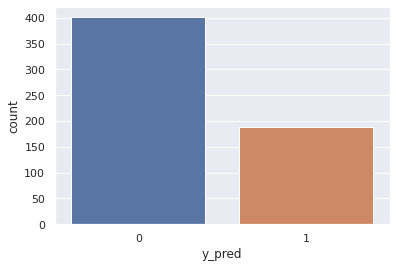

y_test
0         396
1         193
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


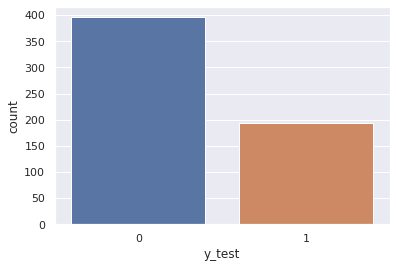

In [166]:
#Set the figure | การทำการ set figure
sns.set()

#Display the number of binary values (0 or 1) of y_pred's dataframe | การแสดงจำนวนของค่าไบนารี่ภายใน dataframe ของ y_pred
print(y_pred.value_counts())

#Plot the catagorical data of the y_pred's dataframe | การพลอตกราฟแยกประเภทของค่าไบนารี่ด้วย countplot()
sns.countplot(y_pred['y_pred'])
plt.show()

#Duplicate the dataframe to avoid confusion | การทำสำเนาของ dataframe เพื่อหลีกเลี่ยงการทับซ้อนกันของการเรียกใช้ dataframe 
A = y_test.copy()

#Rename a column of the dataframe to be another one | การเปลี่ยนชื่อคอลัมน์ของ dataframe ด้วย rename()
A.rename(columns={'high_rain_accumulations_label':'y_test'},inplace=True)

#Display the number of binary values (0 or 1) of y_test's dataframe | การแสดงจำนวนของค่าไบนารี่ภายใน dataframe ของ y_test
print(A.value_counts())

#Plot the catagorical data of the y_test's dataframe | การพลอตกราฟแยกประเภทของค่าไบนารี่ด้วย countplot()
sns.countplot(A['y_test'])
plt.show()

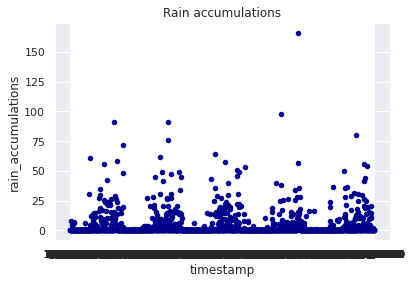

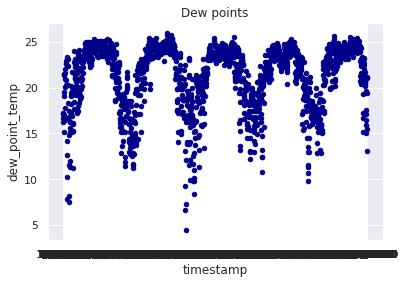

In [167]:
#Plot two variable of the dataframe by selecting rain_accumulations column with scatter plot | การพลอตกราฟสองตัวแปรของ dataframe ด้วย scatter plot
clean_data.plot.scatter(x='timestamp',y='rain_accumulations',c='DarkBlue',title='Rain accumulations')
plt.show()

#Plot two variable of the dataframe by selecting dew_points_temp column with scatter plot | การพลอตกราฟสองตัวแปรของ dataframe ด้วย scatter plot
clean_data.plot.scatter(x='timestamp',y='dew_point_temp',c='DarkBlue',title='Dew points')
plt.show()

---
>Measure the accuracy score of the model
---

In [168]:
#Measure the accuracy score to find how well the model predict the values compare to actual values | การวัดค่าความแม่นยำเพื่อตรวจสอบวาตัวแบบสามารถพยากณ์ค่าได้ดีแค่ไหนเมื่อเปรียบเทียบกับค่าจริง
accuracy_score(y_test, y_pred)

0.8455008488964346

---
>Measure the mean squared error (MSE) of the model
---

In [169]:
#Measure the MSE to find some errors that occurs on this model | การวัดค่า MSE ที่เกิดขึ้นในการ training ตัวแบบ (Loss function) ยิ่งค่าต่ำใกล้ 0 แสดงว่าตัวแบบมีความแม่นยำสูงแต่ควรระวัง overfitting 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.15449915110356535